# Weekly analysis
Goal of the analysis is to see the top 5 salings of the week and wastage for each category. Also comparisation with last year are made.

In [1]:
import pandas as pd
import xlrd
import numpy as np
import matplotlib.pyplot as plt

# Reading the file

In [2]:
category = pd.read_csv('products_list2021.csv', encoding = "ISO-8859-1")
category=pd.DataFrame(category)
category.columns

Index(['Group', ' SKU', ' Description', ' QTY Sales', ' Net £', ' QTY Waste',
       'Cost £', ' Transf Out QTY', ' QTY On Order', ' QTY Sales.1',
       ' Net £.1', 'QTY Waste.1', ' Cost £.1', ' Transf Out QTY.1',
       ' £ % vs LY', 'QTY % vs LY', ' £ vs LY', ' WASTAGE', ' Initial_MarTY',
       ' Initial_MarLY', 'Week'],
      dtype='object')

#  Analysis
Tou type the week and the category  you want analize. 
You can see:

1) Top 5 sales

2) Worst 5 sales

3) 5 highest wastage

4) Quantity in % This Year vs Last Year top 5

5) Quantity in % This Year vs Last Year worst

6) Sales This Year vs Last Year top 5

7) Sales  This Year vs Last Year worst 5

Other information:

1) Total sales of the week

2) Total sales of Last Year at the same week

3) Total Wastage

4) Wastage product scanned

In [4]:
while True:
    week= input("insert week")
    week=category.loc[category["Week"]== float(week)]
    week= pd.DataFrame(week)
    print("Cheese - FTG - Bread - Dairy and Egg - Meat and Fish - Black Barn - Fruit and Veg - Patisserie - Charcuterie - Fresh Juices - Wine Spirits - Deli - TA_drinks")
    Group= input("insert Group")
    if Group == "Cheese" or "FTG" or "Bread" or "Dairy and Egg" or "Meat and Fish" or "Black Barn" or "Fruit and Veg" or "Patisserie" or "Charcuterie" or "Fresh Juices" or "Wine Spirits" or "Deli" or "TA_drinks":
         group=week.loc[week["Group"]== Group]
         group = pd.DataFrame(group)
         group = group.sort_values(by = ' Net £', axis =0, ascending= False, na_position= "last")
         top_net= group.head(5)[[' Description',' Net £', 'Week']]#top 5 sales
         print("Top 5 " + Group)
         print(top_net)
         print("---------------------------------------------------------")
         group = group.sort_values(by = ' Net £', axis =0, ascending= True, na_position= "last")
         group = group[group[' Net £'] !=0]
         worst_net= group.head(5)[[' Description',' Net £', 'Week']]#worst 5 sales
         print("Worst 5 " + Group)
         print(worst_net)
         print("---------------------------------------------------------")
         group = group.sort_values(by = ' WASTAGE', axis =0, ascending= False, na_position= "last")
         group[' WASTAGE'] = pd.to_numeric(group[' WASTAGE'], errors='coerce').fillna(0).map("{:.2%}".format)
         #group= group.dropna()
         Wastage= group.head(5)[[' Description',' WASTAGE', 'Week']]# Wastage
         #Wastage= Wastage.astype(float).map("{:.2%}".format)
         print("Wastsge top 5 " + Group)
         print(Wastage)
         print("---------------------------------------------------------")
         group = group.sort_values(by = 'QTY % vs LY', axis =0, ascending= False, na_position= "last")
         group['QTY % vs LY'] = pd.to_numeric(group['QTY % vs LY'], errors='coerce').fillna(0).map("{:.2%}".format)
         #group= group.dropna()
         quantity_vsLY= group.head(5)[[' Description','QTY % vs LY','Week']]# top quantity increase
         print("Quantity in % This Year vs Last Year top 5" + Group)
         print(quantity_vsLY)
         print("---------------------------------------------------------")
         group = group.sort_values(by = 'QTY % vs LY', axis =0, ascending= True, na_position= "last")
         group['QTY % vs LY'] = pd.to_numeric(group['QTY % vs LY'], errors='coerce').fillna(0).map("{:.2%}".format)
         #group= group.dropna()
         quantity_vsLY= group.head(5)[[' Description','QTY % vs LY','Week']]# worst quantity increase
         print("Quantity in % This Year vs Last Year worst 5" + Group)
         print(quantity_vsLY)
         print("---------------------------------------------------------")
         group = group.sort_values(by = ' £ vs LY', axis =0, ascending= False, na_position= "last")
         #group= group.dropna()
         sales_vsLY= group.head(5)[[' Description',' £ vs LY','Week']]# top sales increase
         print("Sales This Year vs Last Year top 5" + Group)
         print(sales_vsLY)
         print("---------------------------------------------------------")
         group = group.sort_values(by = ' £ vs LY', axis =0, ascending= True, na_position= "last")
         #group= group.dropna()
         sales_vsLY= group.head(5)[[' Description',' £ vs LY','Week']]# worst sales increase
         print("Sales  This Year vs Last Year worst 5" + Group)
         print(sales_vsLY)
         print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        #--------------------------------------------------------------------------------------------------
         totalTY=group[' Net £'].sum()
         totalTY=totalTY.round(2)
         print("Total sales of the week")
         print (str(totalTY) + "£")
         totalLY=group[' Net £.1'].sum()
         totalLY=totalLY.round(2)
         print("Total sales of Last Year at the same week")
         print (str(totalLY) + "£")
         Wastage=group[' QTY Waste'].sum()
         Wastage=Wastage.round(2)
         print("Total Wastage")
         print(Wastage)
         totquant=group[' QTY Sales'].sum()
         totquant=totquant.round(2)
         #print("Total Quantuty sold")
        # print(totquant)
         ratioWas=(Wastage/(Wastage + totquant))* 100
         ratioWas=ratioWas.round(2)
         print("Wastage product scanned")
         print(str(ratioWas) + "%")
         
    else:
        print("Nein")
    fine = input ("vuoi continuare? s/n ")
    if fine == "s":
        continue
    elif fine == "n":
        break

insert week1
Cheese - FTG - Bread - Dairy and Egg - Meat and Fish - Black Barn - Fruit and Veg - Patisserie - Charcuterie - Fresh Juices - Wine Spirits - Deli - TA_drinks
insert GroupCheese
Top 5 Cheese
                            Description   Net £  Week
35  PARMIGIANO REGGIANO DOP 24 MONTHS    284.69   1.0
23  VILLEREJO MANCHEGO CHEESE            284.53   1.0
0   GRUYERE WHOLE WHEEL                  274.56   1.0
10  COMTE                                249.68   1.0
12  MOLITERNO WITH TRUFFLE               246.60   1.0
---------------------------------------------------------
Worst 5 Cheese
                            Description   Net £  Week
50  ADLESTROP                              2.76   1.0
40  HOMEWOOD EWES MILK CHEESE 250G         5.99   1.0
44  BURRATA 125G                           7.98   1.0
45  TUNWORTH                               8.40   1.0
13  QUINCE CHEESE KG                      12.53   1.0
---------------------------------------------------------
Wastsge top 5 Chee

# Category analysis
The goal is to have a quick overview of the product categories over the week. 

the total sales the total and rate  wastage are analyzed compared with the previoys year at the same week.# 

# Reading the file# 

In [6]:
category = pd.read_csv('sumg.csv', encoding = "ISO-8859-1")
category=pd.DataFrame(category)



 # Analysis
You type the category tou want to analyze and will appears:

1) the table with all the sale of the weeks.

2) Three graphs and the sums off 

3) All the sales until the last week.

All compared with last year.

Cheese - FTG - Bread - Dairy and Egg - Meat and Fish - Black Barn - Fruit and Veg - Patisserie - Charcuterie - Fresh Juices - Wine Spirits - Deli - TA_drinks
Category Deli
Group   Net £TY   Net £LY   Cost £TY   Cost £LY   Wastage%TY   Wastage%LY  Week
Deli   5583.56   4118.91      82.54     260.83     1.456734     5.955376     1
Deli   3961.79   4798.60     735.89     503.52    15.664967     9.496579     2
Deli   5037.89   5103.19     152.36      29.26     2.935504     0.570098     3
Deli   5436.54   5873.97     229.40     279.13     4.048754     4.536413     4
Deli   4749.09   5581.45      78.20     155.20     1.619957     2.705412     5
Deli   4749.09   5581.45      78.20     155.20     1.619957     2.705412     5


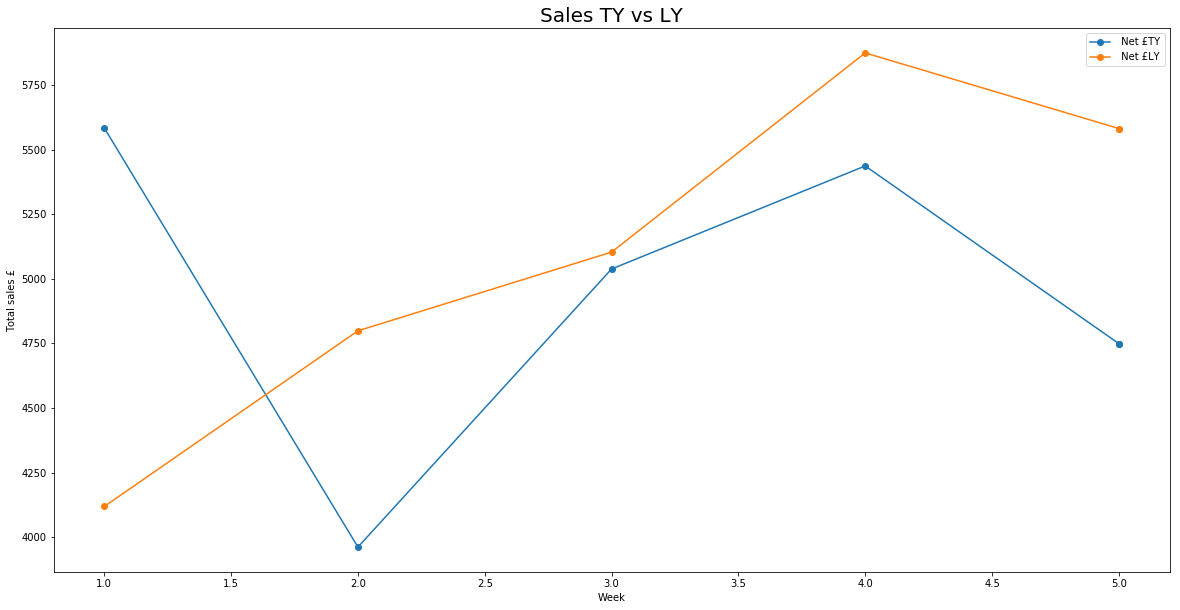

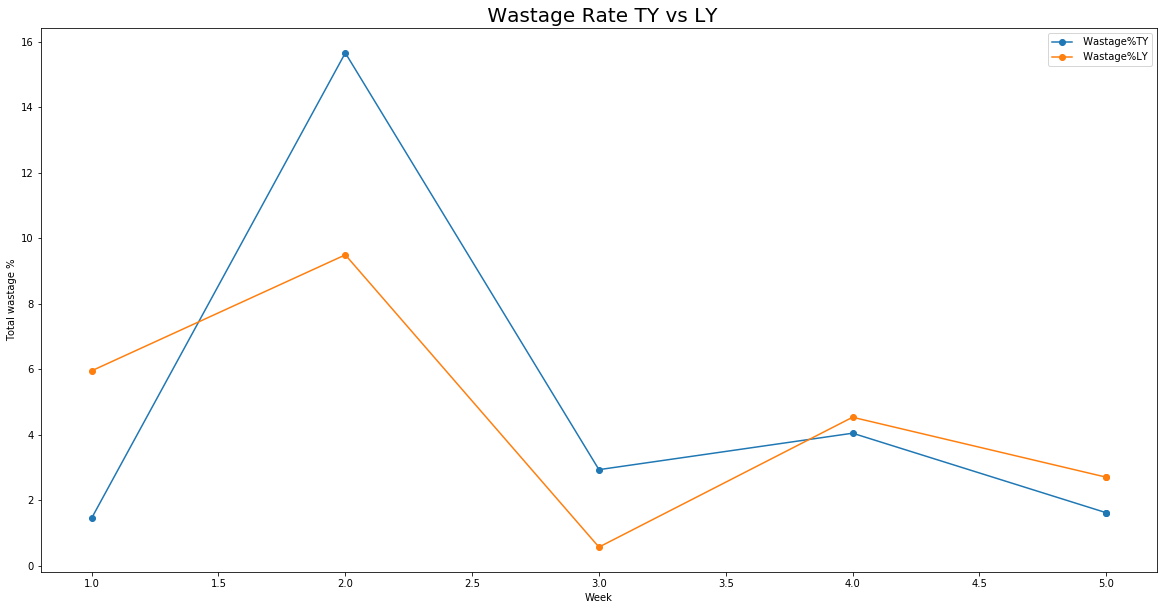

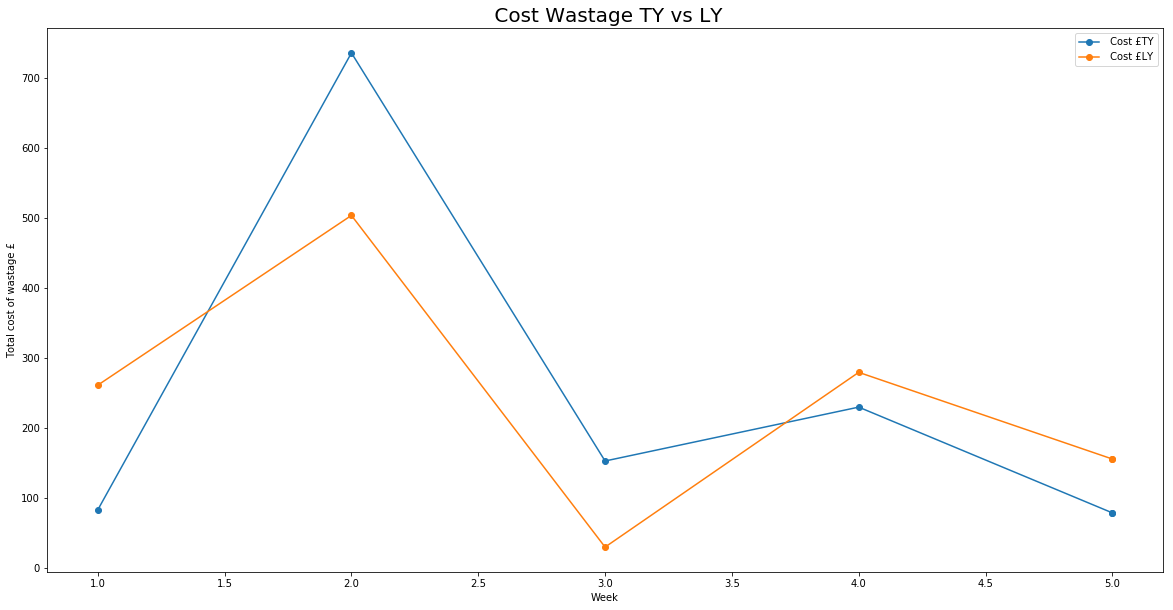

Total sales of the year
29517.96 £
Total sales of Last Year
31057.57 £
Mean sales per week
4919.659999999999 £
Mean sales per week Last Year
5176.261666666665 £
Cost wastage of the year
1356.59 £
Cost wastage of Last Year
1383.14 £
Total % of Wastage of TY
4.39%
Total % of Wastage of LY
4.26%


In [8]:
print("Cheese - FTG - Bread - Dairy and Egg - Meat and Fish - Black Barn - Fruit and Veg - Patisserie - Charcuterie - Fresh Juices - Wine Spirits - Deli - TA_drinks")
product= input("Category ")
product=category.loc[category["Group"]== product]
product= pd.DataFrame(product)
product=product.sort_values(by=['Week'])
product=product.rename(columns={' Net £': ' Net £TY', ' Net £.1': ' Net £LY', ' Cost £': ' Cost £TY', ' Cost £.1': ' Cost £LY',})
    
print(product.to_string(index=False))
fig= product.plot(x="Week", y=[' Net £TY' ," Net £LY"], marker='o', figsize=(20,10))
fig.set_title('Sales TY vs LY', fontsize=20)
plt.ylabel('Total sales £')
plt.show(fig)

fig= product.plot(x="Week", y=[' Wastage%TY' ," Wastage%LY"], marker='o', figsize=(20,10))
fig.set_title(' Wastage Rate TY vs LY', fontsize=20)
plt.ylabel('Total wastage %')
plt.show(fig)
    
fig= product.plot(x="Week", y=[' Cost £TY' ," Cost £LY"], marker='o', figsize=(20,10))
fig.set_title(' Cost Wastage TY vs LY', fontsize=20)
plt.ylabel('Total cost of wastage £')
plt.show(fig)
    
totalTY=product[' Net £TY'].sum()
totalTY=totalTY.round(2)
print("Total sales of the year")
print(str(totalTY) + ' £')
totalLY=product[' Net £LY'].sum()
totalLY=totalLY.round(2)
print("Total sales of Last Year")
print(str(totalLY) + ' £')
meanTY=product[' Net £TY'].mean()
print("Mean sales per week")
print(str(meanTY) + ' £')
meanLY=product[' Net £LY'].mean()
print("Mean sales per week Last Year")
print(str(meanLY) + ' £')
tot_wastTY=product[' Cost £TY'].sum()
tot_wastTY=tot_wastTY.round(2)
print("Cost wastage of the year")
print(str(tot_wastTY) + ' £')
tot_wastLY=product[' Cost £LY'].sum()
tot_wastLY=tot_wastLY.round(2)
print("Cost wastage of Last Year")
print(str(tot_wastLY) + ' £')
rate_wast= ((tot_wastTY/(tot_wastTY + totalTY) * 100)).round(2)
print("Total % of Wastage of TY")
print (str(rate_wast) + '%')
rate_wast= ((tot_wastLY/(tot_wastLY + totalLY) * 100)).round(2)
print("Total % of Wastage of LY")
print (str(rate_wast) + '%')

# # Total analysis
The goal is to have a quick overview of the Total buisness over the week. 

the total sales the total and rate  wastage are analyzed compared with the previos year at the same week.


# # Reading the file

In [9]:
category = pd.read_csv('tot.csv', encoding = "ISO-8859-1")
category=pd.DataFrame(category)
print(category)

   Week     Net £   Net £.1   Cost £   Cost £.1   Wastage%TY   Wastage%LY
0     1  68873.07  51882.51  2219.12    4472.80     3.121468     7.936785
1     2  52411.88  47265.32  5164.28    4007.26     8.969476     7.815600
2     3  56853.20  56735.22  2517.65    1486.15     4.240549     2.552585
3     4  58234.09  61061.51  1775.81    1781.52     2.959195     2.834873
4     5  59413.09  59316.82  2577.92    1547.70     4.158538     2.542861


#  # Analysis

1) the table with all the sale of the weeks.

2) Three graphs and the sums off 

3) All the sales until the last week.

All compared with last year.

Week   Net £TY   Net £LY   Cost £TY   Cost £LY   Wastage%TY   Wastage%LY
   1  68873.07  51882.51    2219.12    4472.80     3.121468     7.936785
   2  52411.88  47265.32    5164.28    4007.26     8.969476     7.815600
   3  56853.20  56735.22    2517.65    1486.15     4.240549     2.552585
   4  58234.09  61061.51    1775.81    1781.52     2.959195     2.834873
   5  59413.09  59316.82    2577.92    1547.70     4.158538     2.542861


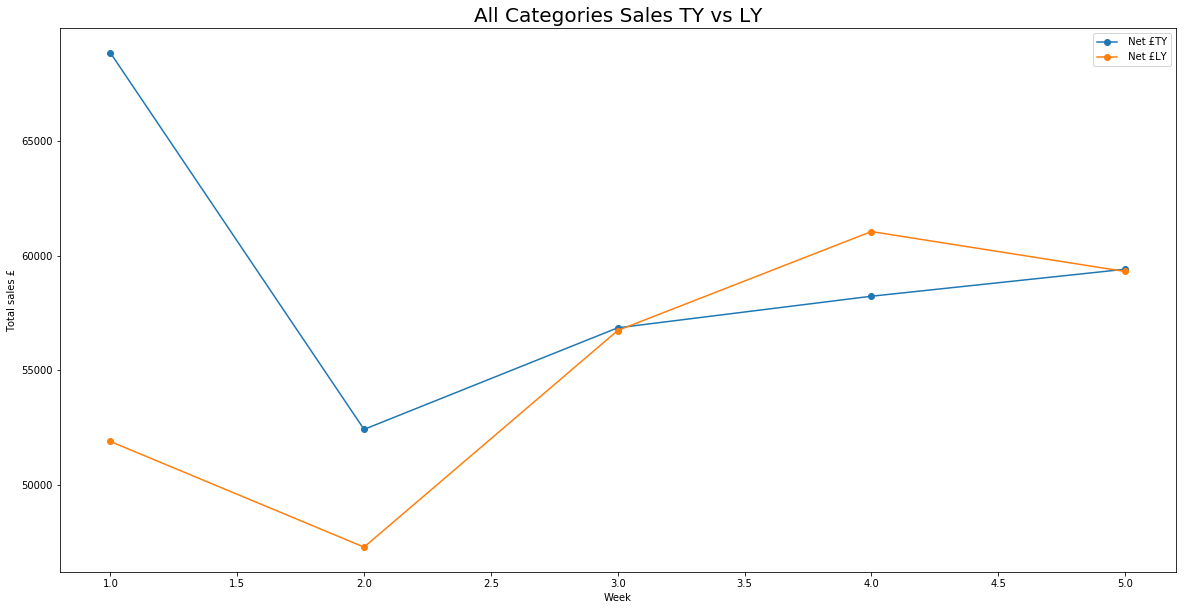

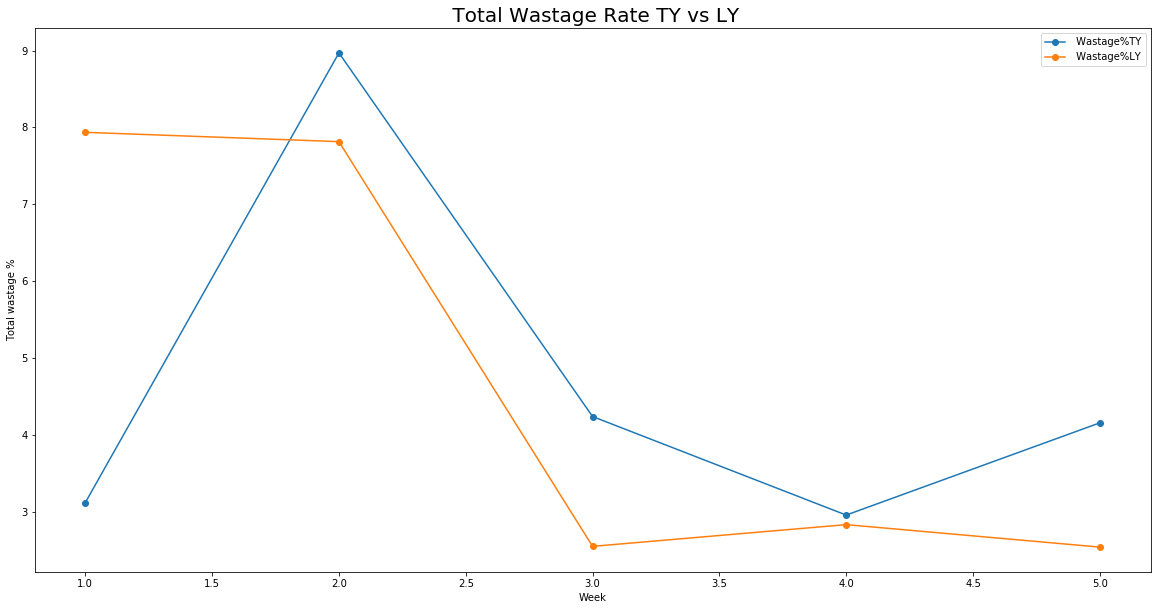

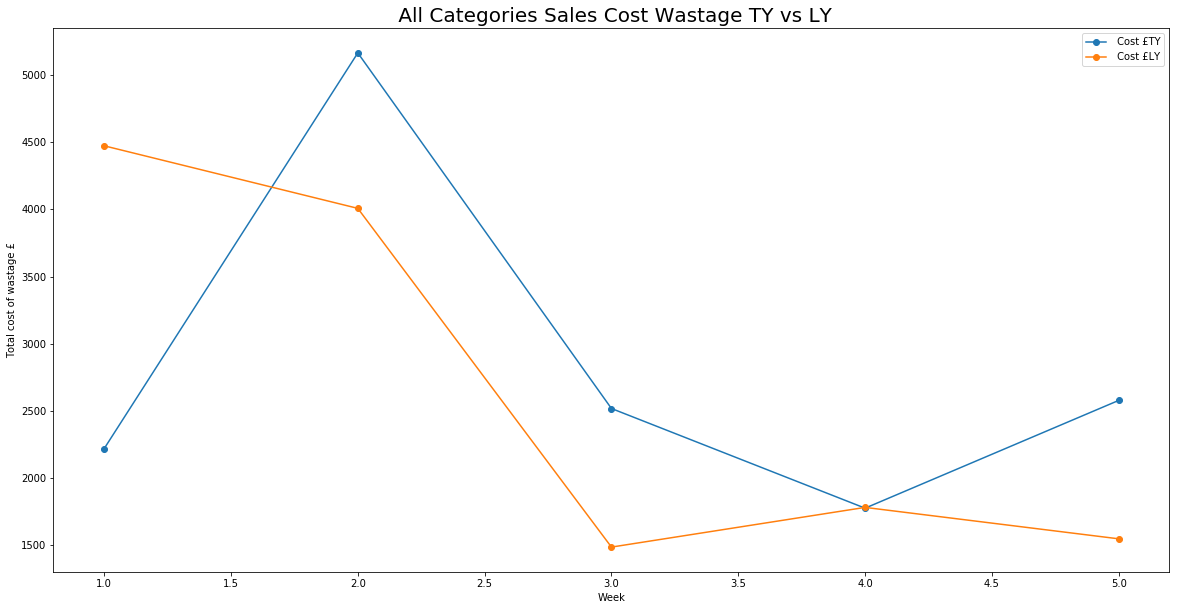

Total sales of the year
295785.33 £
Total sales of Last Year
276261.38 £
Mean sales per week
59157.06599999999 £
Mean sales per  week Last Year
55252.27599999999 £
Cost wastage of the year
14254.78 £
Cost wastage of Last Year
13295.43 £
Total % of Wastage of TY
4.6%
Total % of Wastage of LY
4.59%


In [10]:
    product= pd.DataFrame(category)
    product=product.sort_values(by=['Week'])
    product=product.rename(columns={'Net £': ' Net £TY', ' Net £.1': ' Net £LY', ' Cost £': ' Cost £TY', ' Cost £.1': ' Cost £LY',})
    
    print(product.to_string(index=False))
    fig= product.plot(x="Week", y=[' Net £TY' ," Net £LY"], marker='o', figsize=(20,10))
    fig.set_title('All Categories Sales TY vs LY', fontsize=20)
    plt.ylabel('Total sales £')
    plt.show(fig)

    fig= product.plot(x="Week", y=[' Wastage%TY' ," Wastage%LY"], marker='o', figsize=(20,10))
    fig.set_title(' Total Wastage Rate TY vs LY', fontsize=20)
    plt.ylabel('Total wastage %')
    plt.show(fig)
    
    fig= product.plot(x="Week", y=[' Cost £TY' ," Cost £LY"], marker='o', figsize=(20,10))
    fig.set_title(' All Categories Sales Cost Wastage TY vs LY', fontsize=20)
    plt.ylabel('Total cost of wastage £')
    plt.show(fig)
    
    totalTY=product[' Net £TY'].sum()
    totalTY=totalTY.round(2)
    print("Total sales of the year")
    print(str(totalTY) + ' £')
    totalLY=product[' Net £LY'].sum()
    totalLY=totalLY.round(2)
    print("Total sales of Last Year")
    print(str(totalLY) + ' £')
    meanTY=product[' Net £TY'].mean()
    #meanTY=meanTY.round(2)
    print("Mean sales per week")
    print(str(meanTY) + ' £')
    meanLY=product[' Net £LY'].mean()
    #meanLY=meanLY.round(2)
    print("Mean sales per  week Last Year")
    print(str(meanLY) + ' £')
    tot_wastTY=product[' Cost £TY'].sum()
    tot_wastTY=tot_wastTY.round(2)
    print("Cost wastage of the year")
    print(str(tot_wastTY) + ' £')
    tot_wastLY=product[' Cost £LY'].sum()
    tot_wastLY=tot_wastLY.round(2)
    print("Cost wastage of Last Year")
    print(str(tot_wastLY) + ' £')
    rate_wast= ((tot_wastTY/(tot_wastTY + totalTY) * 100)).round(2)
    print("Total % of Wastage of TY")
    print (str(rate_wast) + '%')
    rate_wast= ((tot_wastLY/(tot_wastLY + totalLY) * 100)).round(2)
    print("Total % of Wastage of LY")
    print (str(rate_wast) + '%')